# K-Nearest Neighbors (KNN): A Comprehensive Guide

## Introduction

Welcome to this comprehensive guide on the K-Nearest Neighbors (KNN) algorithm! KNN is an intuitive and effective supervised learning algorithm used for both classification and regression tasks. In this notebook, we'll focus on its application in classification.

### Objectives
- Understand the core concepts of the KNN algorithm.
- Learn about different distance metrics used in KNN.
- Implement a KNN classifier using `scikit-learn`.
- Preprocess data for a real-world dataset.
- Tune the value of K to improve model performance.

### How KNN Works
The K-Nearest Neighbors algorithm works by following these steps:
1.  **Choose a value for K:** K is a user-defined constant representing the number of neighbors to consider (e.g., 1, 3, 5).

    ### What Are These "Neighbors" in Actual Sense?
    In the context of machine learning and KNN, **neighbors** are simply the data points in your training dataset that are most similar to the new point you're trying to classify. The "nearness" or similarity is determined by calculating distances in the feature space.
    The term "neighbor" comes from the geometric interpretation - if you plot all passengers as points in a multi-dimensional space (where each dimension represents a feature), neighbors are literally the closest points in that space.

2.  **Find the K-nearest neighbors:** When you have a new data point that you want to classify, the algorithm measures how far away this new point is from every single point in your training data. Think of it like finding the closest houses to yours in a neighborhood - you measure the distance to each house and then pick the K closest ones. These K closest data points are called the "neighbors" of your new point. The distance can be measured in different ways (which we'll explore in the next section), but the key idea is that points that are closer together are more likely to belong to the same category.

3.  **Predict the label:**
    *   For **classification**, the algorithm predicts the class that is most common among the K neighbors (majority vote).
    *   For **regression**, it predicts the average value of the target metric of the K neighbors.

Here's a visual representation of how different values of K can lead to different classifications:
<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/best_k_fs.png' width = "550">

KNN is unique because it does very little during the "fitting" phase. It simply stores the entire training dataset. The real work happens during the "prediction" phase.


## Distance Metrics

The concept of "nearness" in KNN is defined by a distance metric. The choice of metric is crucial and can significantly impact the model's performance. Let's explore the most common ones.

The underlying assumption is that **distance helps us quantify similarity**. The closer two data points are in the feature space, the more similar they are.

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/knn_fs.png' width = "300">

### Manhattan Distance
Manhattan distance is the distance between two points measured along the axes at right angles. Imagine navigating a city grid like Manhattan's; you can only travel along the streets (horizontally or vertically), not diagonally through buildings.

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/manhattan_fs.png' width="300">

The formula for Manhattan distance is:
$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$

### Euclidean Distance
This is the most common distance metric and represents the shortest straight-line distance between two points. It's derived from the Pythagorean theorem.

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/euclidean_fs.png' width = "200">

The formula for Euclidean distance is:
$$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$

### Minkowski Distance
Minkowski distance is a generalized metric. Both Manhattan and Euclidean distances are special cases of Minkowski distance.

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$

- When `c=1`, it's the Manhattan distance.
- When `c=2`, it's the Euclidean distance.

In [1]:
# Code demonstration of distance metrics
from math import sqrt

# Two points in 3D space
A = (2, 3, 5)
B = (1, -1, 3)

# Calculate Manhattan Distance
manhattan_distance = 0
for i in range(len(A)):
    manhattan_distance += abs(A[i] - B[i])

print(f"Manhattan Distance: {manhattan_distance}")

# Calculate Euclidean Distance
euclidean_distance = 0
for i in range(len(A)):
    euclidean_distance += (A[i] - B[i]) ** 2
euclidean_distance = sqrt(euclidean_distance)

print(f"Euclidean Distance: {euclidean_distance:.4f}")

Manhattan Distance: 7
Euclidean Distance: 4.5826


## KNN with Scikit-Learn: A Practical Example

While it's insightful to build algorithms from scratch, in practice, we use optimized libraries like `scikit-learn`. Their implementations are fast, robust, and feature-rich.

We will now build a KNN classifier to predict passenger survival on the Titanic, using the `titanic.csv` dataset.

### Step 1: Load and Explore the Data
First, let's load our dataset using pandas and take a look at the first few rows.

In [2]:
import pandas as pd

# Import the data from 'titanic.csv'
raw_df = pd.read_csv('titanic.csv')

# Print the head of the DataFrame
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Data Preprocessing

Real-world data is often messy. Preprocessing is a crucial step to clean and prepare the data for our model. Our preprocessing will involve:
1.  **Removing unnecessary columns**: Columns like `PassengerId`, `Name`, `Ticket`, and `Cabin` are unique to each passenger and don't provide generalizable patterns for the model.
2.  **Handling missing values**: We'll check for missing data and decide on a strategy to handle it (e.g., filling with the median or dropping rows).
3.  **Encoding categorical features**: Machine learning models require numerical input. We'll convert categorical columns like `Sex` and `Embarked` into numbers.
4.  **Separating features and target**: We'll isolate our target variable, `Survived`.

In [3]:
# Make a copy to work on
df = raw_df.copy()

# 1. Remove unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 2. Convert 'Sex' to a binary encoding (female: 0, male: 1)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# 3. Handle missing values
# For 'Age', fill missing values with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())
# For 'Embarked', drop the few rows that have missing values
df = df.dropna()

# 4. One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 5. Separate features (X) and target (y)
labels = df['Survived']
features = df.drop('Survived', axis=1)

print("Preprocessed Data Head:")
features.head()

Preprocessed Data Head:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,True
1,1,0,38.0,1,0,71.2833,False,False
2,3,0,26.0,0,0,7.9250,False,True
3,1,0,35.0,1,0,53.1000,False,True
4,3,1,35.0,0,0,8.0500,False,True


### Step 3: Splitting and Scaling the Data

Before training, we need to:
1.  **Split the data**: Divide the dataset into a training set (for teaching the model) and a test set (for evaluating its performance on unseen data).
2.  **Scale the features**: KNN is a distance-based algorithm. Features on larger scales can disproportionately influence the distance calculation. We use `StandardScaler` to normalize the data, giving all features a mean of 0 and a standard deviation of 1. We fit the scaler on the training data only to prevent data leakage from the test set.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For readability, let's convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features.columns)

print("Scaled Training Data Head:")
X_train_scaled.head()

Scaled Training Data Head:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.815528,-1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.311768,0.620174
1,-0.386113,-1.390655,1.550175,-0.474917,-0.480663,-0.435393,-0.311768,0.620174
2,-0.386113,0.719086,-0.120137,-0.474917,-0.480663,-0.644473,-0.311768,0.620174
3,-1.587755,0.719086,-0.120137,-0.474917,-0.480663,-0.115799,-0.311768,0.620174
4,0.815528,-1.390655,-1.107139,0.413551,-0.480663,-0.356656,-0.311768,-1.612452


### Step 4: Fitting and Evaluating the KNN Model

Now we're ready to train our model! We'll start with a default value for K (scikit-learn's default is 5) and then evaluate its performance using common classification metrics:
-   **Accuracy**: The proportion of correct predictions.
-   **Precision**: The proportion of positive predictions that were actually correct.
-   **Recall**: The proportion of actual positives that were identified correctly.
-   **F1-Score**: The harmonic mean of precision and recall, providing a single score that balances both.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate KNeighborsClassifier with n_neighbors=5
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Generate predictions on the test data
test_preds = knn.predict(X_test_scaled)

# Evaluate the model
def print_metrics(labels, preds):
    print(f"Accuracy: {accuracy_score(labels, preds):.4f}")
    print(f"Precision: {precision_score(labels, preds):.4f}")
    print(f"Recall: {recall_score(labels, preds):.4f}")
    print(f"F1 Score: {f1_score(labels, preds):.4f}")

print("Model Performance (K=5):")
print_metrics(y_test, test_preds)

Model Performance (K=5):
Accuracy: 0.7892
Precision: 0.7059
Recall: 0.7317
F1 Score: 0.7186


## Finding the Best Value for K

The choice of K is critical as it significantly influences the model's performance by controlling the **bias-variance trade-off**.

-   A **small K** (e.g., K=1) results in a model with **low bias** but **high variance**. The model is very flexible and can capture fine-grained patterns, but it's also highly sensitive to noise and outliers in the training data. This can lead to **overfitting**, where the decision boundary is overly complex and doesn't generalize well to new, unseen data.

-   A **large K** results in a model with **high bias** and **low variance**. The model is less flexible because it considers a larger neighborhood to make predictions. This makes it more robust to noise but can lead to **underfitting**, where the decision boundary is too simple and fails to capture the underlying patterns in the data.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/fit_fs.png" width = "700">

### How to Find the Optimal K?
The goal is to find a "sweet spot" for K that balances bias and variance, resulting in a model that generalizes well. A common method is to iterate through a range of K values and evaluate the model's performance for each, typically using a metric like F1-score or accuracy.

A robust approach is to use **cross-validation**. Instead of a single train-test split, cross-validation splits the training data into multiple "folds" and iteratively trains and validates the model on different combinations of these folds. This provides a more reliable estimate of the model's performance for each K.

### Do Values of K Always Have to Be Odd?
It is a common convention to use an odd value for K in binary classification problems. This is done to **avoid ties** in the voting process. If K is even (e.g., K=4) and the neighbors are split evenly between two classes (e.g., 2 for Class A and 2 for Class B), the model would have to make an arbitrary choice, which can lead to inconsistent predictions.

However, this is not a strict requirement:
- For multi-class problems, ties are less likely but still possible.
- `scikit-learn`'s `KNeighborsClassifier` has a built-in mechanism to handle ties: it will select the class of the neighbor that is closest to the query point.
- For regression tasks, where the prediction is an average, the value of K being odd or even is irrelevant.

For this tutorial, we will stick to odd numbers to follow the common convention for binary classification.

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/plot_fs.png' width="550">

## Generalization and Overfitting
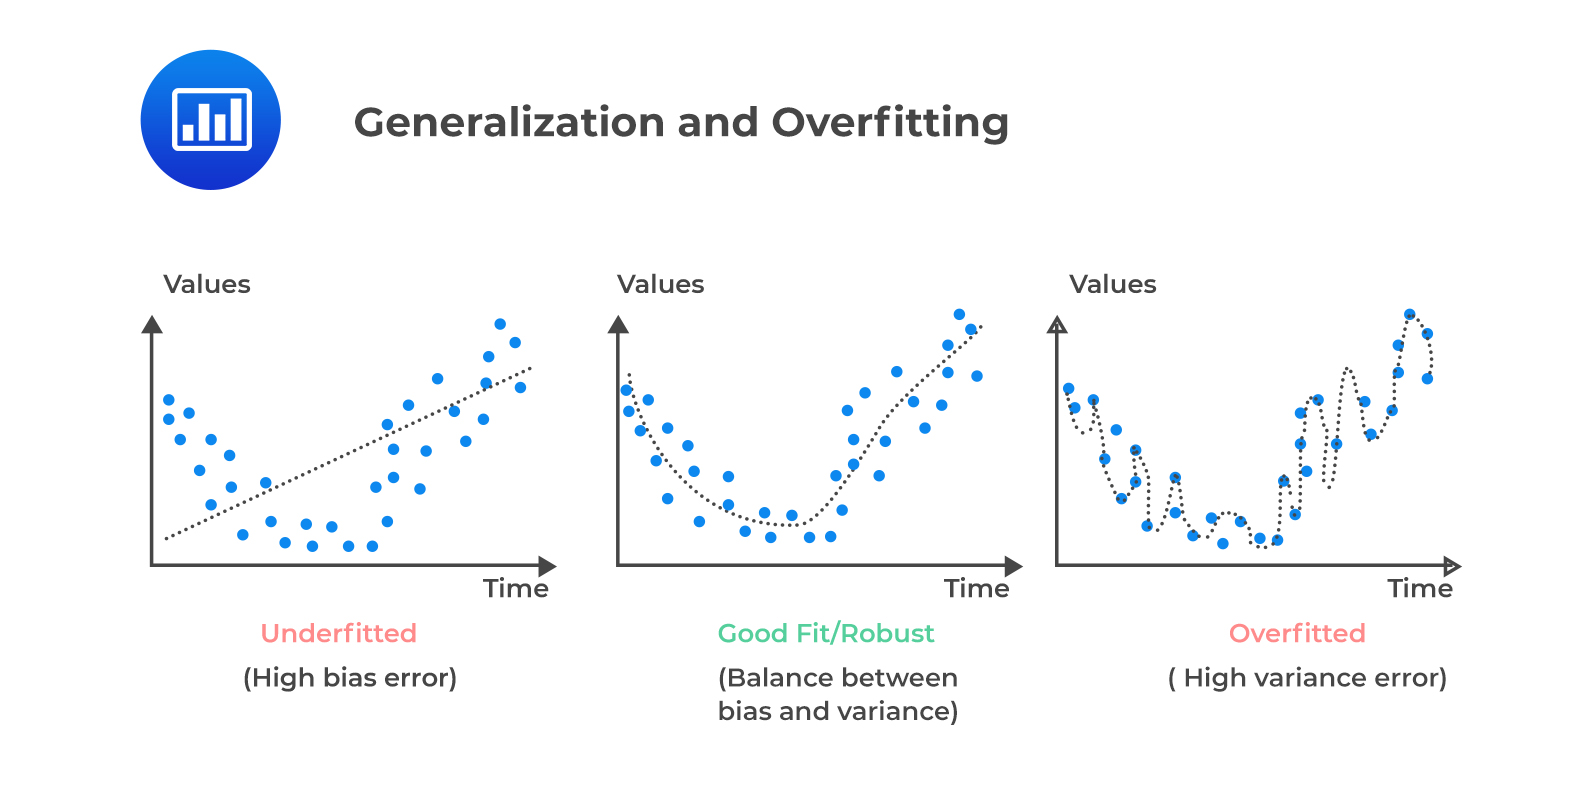

Best Value for K: 17
F1-Score: 0.7468


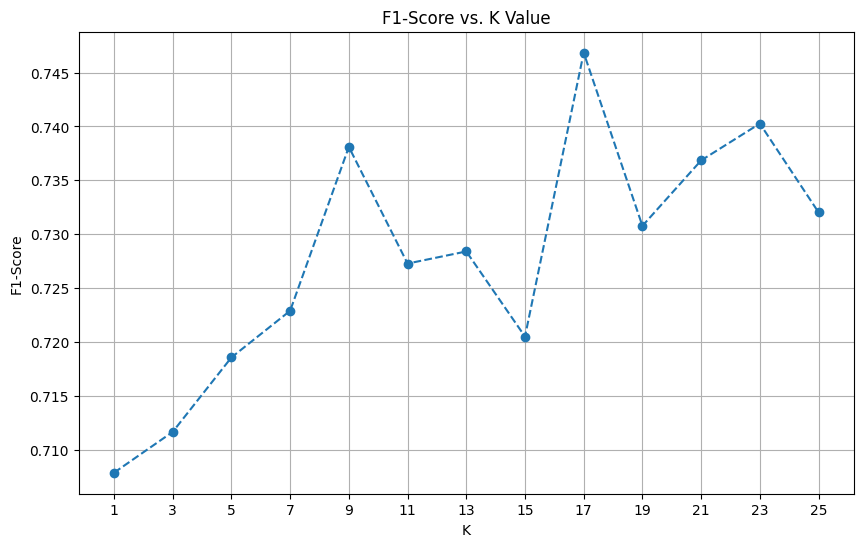

In [6]:
import matplotlib.pyplot as plt

# Find the best K
f1_scores = []
k_range = range(1, 26, 2) # Check odd K values from 1 to 25

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, preds))

best_f1 = max(f1_scores)
best_k = k_range[f1_scores.index(best_f1)]

print(f"Best Value for K: {best_k}")
print(f"F1-Score: {best_f1:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, f1_scores, marker='o', linestyle='--')
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## KNN and the Curse of Dimensionality

It's important to note that KNN's performance can degrade in high-dimensional spaces (datasets with many features). This is known as the **curse of dimensionality**, a phenomenon that affects distance-based algorithms like KNN in several ways:

1.  **Distances Become Less Meaningful**: As the number of dimensions (features) increases, the distance between any two points in the feature space tends to become very similar. The concept of "nearness" becomes less useful because the farthest point is often almost as close as the nearest point. This makes it difficult for KNN to distinguish between neighbors and non-neighbors effectively.

2.  **Increased Computational Cost**: The complexity of KNN grows exponentially with the number of data points and features. For each prediction, the algorithm must compute the distance to every single point in the training set across all dimensions. This can make the algorithm prohibitively slow for datasets with millions of rows and thousands of columns.

3.  **Need for More Data**: To maintain the same density of data points as in lower dimensions, an exponential increase in the amount of data is required. Without this, the feature space becomes sparse, and the K-nearest neighbors might be too far away to give a meaningful prediction.

For very large datasets with thousands of features, other algorithms that are less sensitive to high dimensionality, such as Linear Models, Tree-based Models, or Support Vector Machines, might be more suitable.

## Summary

In this notebook, you've learned:
-   **KNN** is an intuitive, distance-based algorithm for classification and regression.
-   The choice of **distance metric** (Euclidean, Manhattan, etc.) and the value of **K** are critical hyperparameters.
-   **Data preprocessing**, including cleaning, encoding, and scaling, is essential for building a robust model.
-   You can find an optimal value for **K** by iterating through a range of values and evaluating model performance.

Congratulations! You've added another powerful algorithm to your data science toolkit. KNN is a great starting point for many classification problems, especially on smaller, well-curated datasets.